In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from collections import Counter
from sklearn import preprocessing
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set_context("talk")

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
ls data

crime_astros_finalA.csv*   crime_rockets_finalB.csv*  crime_texans_final.csv*
crime_astros_finalB.csv*   crime_rockets_final.csv*   crime_uh_finalA.csv*
crime_astros_final.csv*    crime_ru_finalB.csv*       crime_uh_finalB.csv*
crime_dynamo_finalA.csv*   crime_ru_final.csv*        crime_uh_final.csv*
crime_dynamo_finalB.csv*   crime_ru_final.csvA.csv*   Position_Salaries.csv*
crime_dynamo_final.csv*    crime_texans_finalA.csv*
crime_rockets_finalA.csv*  crime_texans_finalB.csv*


In [3]:
path = 'data/crime_astros_finalB.csv'
team = 'Houston Astros'
df = pd.read_csv(path)
#df.drop(['date','dist_stadium_meadian','premise_mode'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)

nogame = df.game =='No Game'
df = df[~nogame]


#df.drop(['month','offense_mode'],axis=1,inplace=True) # 194
#df.drop(['month','offense_mode','premise_mode'],axis=1,inplace=True) # 119
#df.drop(['month','offense_mode','season'],axis=1,inplace=True) # 192
#df.drop(['offense_mode','season',],axis=1,inplace=True) # 199
#df.drop(['offense_mode','dist_stadium_meadian'],axis=1,inplace=True) # 199
#df.drop(['weekday','dist_stadium_meadian'],axis=1,inplace=True) # 206
#df.drop(['weekday','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) # 139
#df.drop(['offense_mode','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) # 126
#df.drop(['offense_mode','premise_mode','season','dist_stadium_meadian'],axis=1,inplace=True) # 126
#df.drop(['offense_mode','season','premise_mode'],axis=1,inplace=True) # 128
#df.drop(['premise_mode','offense_mode'],axis=1,inplace=True) # 128
#df.drop(['weekday','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) # 139

In [4]:
### get dummies
dfd = pd.get_dummies(df,drop_first=True)
dfd.columns = [c.replace("'", '') for c in dfd.columns]
dfd.columns = [c.replace(".", '') for c in dfd.columns]
dfd.columns = [c.replace("&", 'n') for c in dfd.columns]
dfd.columns = [c.replace(' ', '_') for c in dfd.columns]
dfd.head()

,crime_total,year,dist_stadium_meadian,hour_mode,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,...,premise_mode_stadium,premise_mode_store,premise_mode_street,premise_mode_unk,premise_mode_warehouse,offense_mode_Auto_Theft,offense_mode_Burglary,offense_mode_Robbery,offense_mode_Theft,game_Won_Game
94,14,2010,0.331182,19,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
95,7,2010,0.511708,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
96,7,2010,0.498919,12,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
98,9,2010,0.594481,12,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
99,9,2010,0.621294,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
X = dfd.drop(['crime_total'],axis=1)  # predictors

#X = dfd[['dist_stadium_meadian']]
cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total

form = 'crime_total ~'+ formula
#form = 'crime_total ~ hour_mode + year'
m = ols(form,dfd).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            crime_total   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     3.246
Date:                Wed, 25 Jul 2018   Prob (F-statistic):           8.86e-13
Time:                        23:30:21   Log-Likelihood:                -1612.5
No. Observations:                 655   AIC:                             3339.
Df Residuals:                     598   BIC:                             3595.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [6]:
df.head()

,crime_total,weekday,month,year,dist_stadium_meadian,season,part_day_mode,hour_mode,premise_mode,offense_mode,game
94,14,Monday,Apr,2010,0.331182,Spring,Evening,19,comm prk,Theft,Lost Game
95,7,Tuesday,Apr,2010,0.511708,Spring,Afternoon,0,comm prk,Auto Theft,Lost Game
96,7,Wednesday,Apr,2010,0.498919,Spring,Afternoon,12,comm prk,Theft,Lost Game
98,9,Friday,Apr,2010,0.594481,Spring,Evening,12,store,Theft,Lost Game
99,9,Saturday,Apr,2010,0.621294,Spring,Afternoon,0,prk,Theft,Lost Game


## EDA & Summary Statistics

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


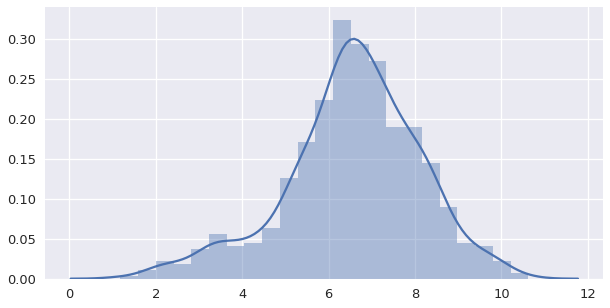

In [7]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(m.fittedvalues)
plt.show()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


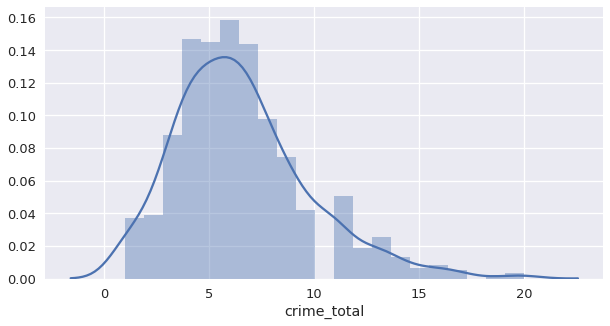

In [8]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(dfd['crime_total'])
plt.show()

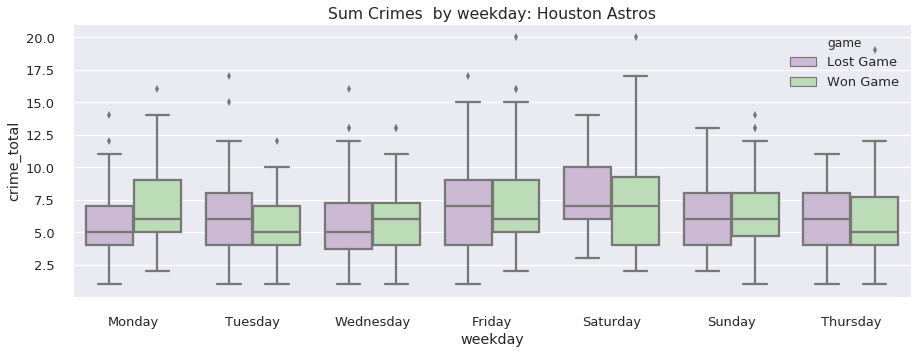

In [9]:
title = 'Sum Crimes  by weekday: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="weekday", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))


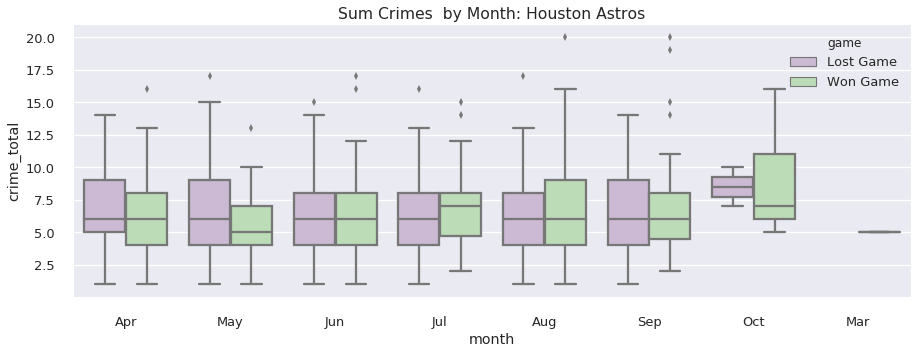

In [10]:
title = 'Sum Crimes  by Month: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="month", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

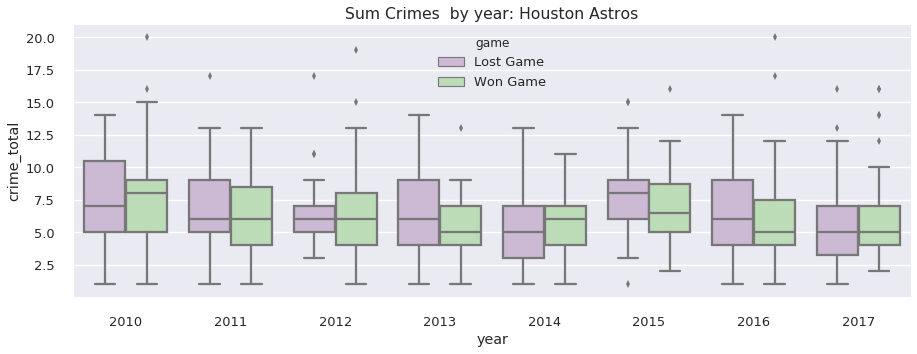

In [11]:
title = 'Sum Crimes  by year: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="year", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

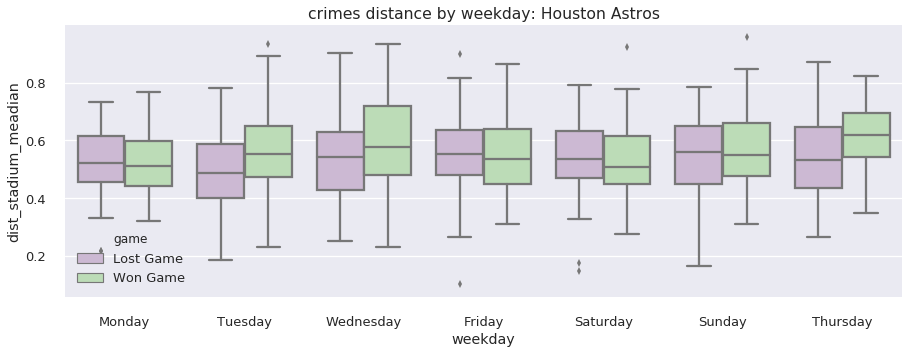

In [12]:
title = 'crimes distance by weekday: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="weekday", y="dist_stadium_meadian", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

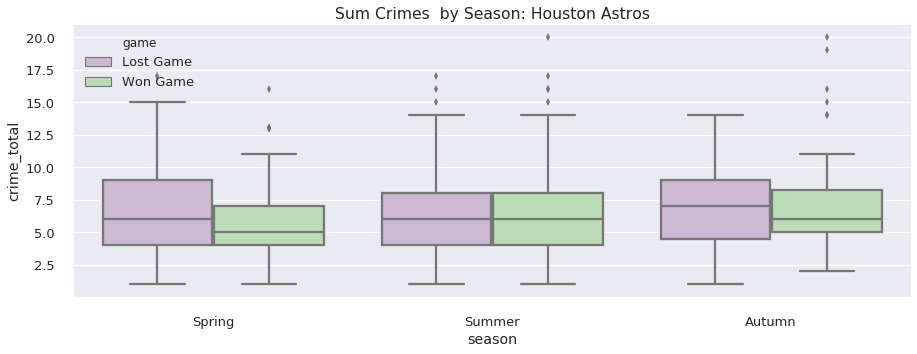

In [13]:
title = 'Sum Crimes  by Season: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="season", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)

plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

## Relationships

## linear regression

In [14]:
### get dummies

dfd = pd.get_dummies(df,drop_first=True)
dfd.columns = [c.replace(' ', '_') for c in dfd.columns]
dfd.head()

,crime_total,year,dist_stadium_meadian,hour_mode,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,...,premise_mode_stadium,premise_mode_store,premise_mode_street,premise_mode_unk,premise_mode_warehouse,offense_mode_Auto_Theft,offense_mode_Burglary,offense_mode_Robbery,offense_mode_Theft,game_Won_Game
94,14,2010,0.331182,19,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
95,7,2010,0.511708,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
96,7,2010,0.498919,12,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
98,9,2010,0.594481,12,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
99,9,2010,0.621294,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
from sklearn import cross_validation, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
alg1 = LinearRegression(normalize=True)
alg2 = Ridge(alpha=0.1,normalize=True)
alg3 = Lasso(alpha=0.1,normalize=True)

In [17]:
def modelfit(alg, X,y):
    '''
    target = y
    predictors = X
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    #Fit the algorithm on the data
    alg.fit(X_train,y_train)
    #Predict training set:
    train_predictions = alg.predict(X_train)
    #Perform cross-validation:
    cv_score = cross_val_score(alg, X, y, cv=10, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
    print ("CV Score : Mean  %.4g | Std  %.4g | Min  %.4g | Max  %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
)

In [18]:
X_cols = list(X.columns)


Model Report
RMSE : 2.811
CV Score : Mean  6.38e+13 | Std  1.081e+14 | Min  2.994 | Max  3.154e+14


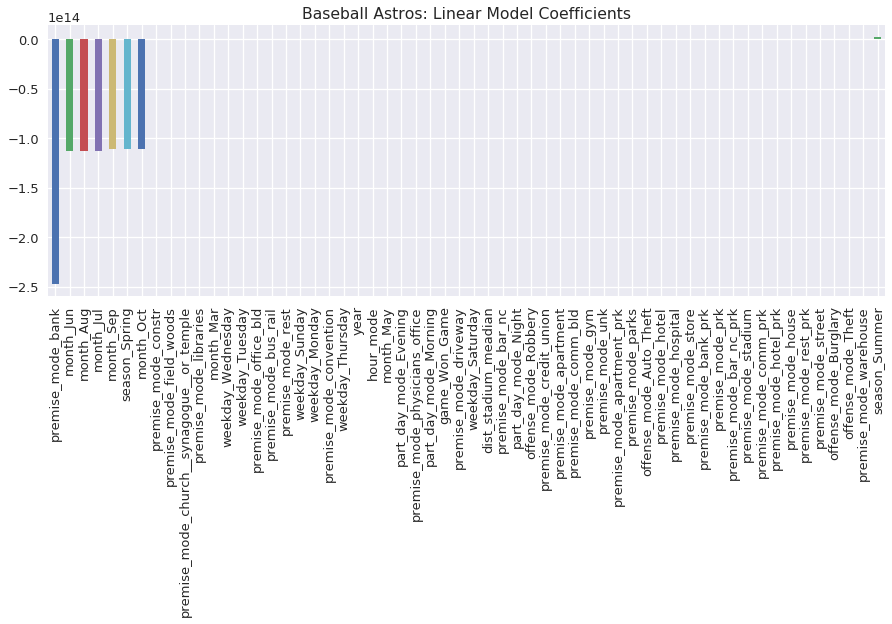

In [19]:
title = 'Baseball Astros: Linear Model Coefficients'
modelfit(alg1,X,y)
coef1 = pd.Series(alg1.coef_, X_cols).sort_values()
coef1.plot(kind='bar', title=title,figsize=(15,5))
plt.savefig(title.replace(' ','_'),bbox_inches="tight")
plt.show()


Model Report
RMSE : 2.818
CV Score : Mean  3.085 | Std  0.3041 | Min  2.538 | Max  3.513


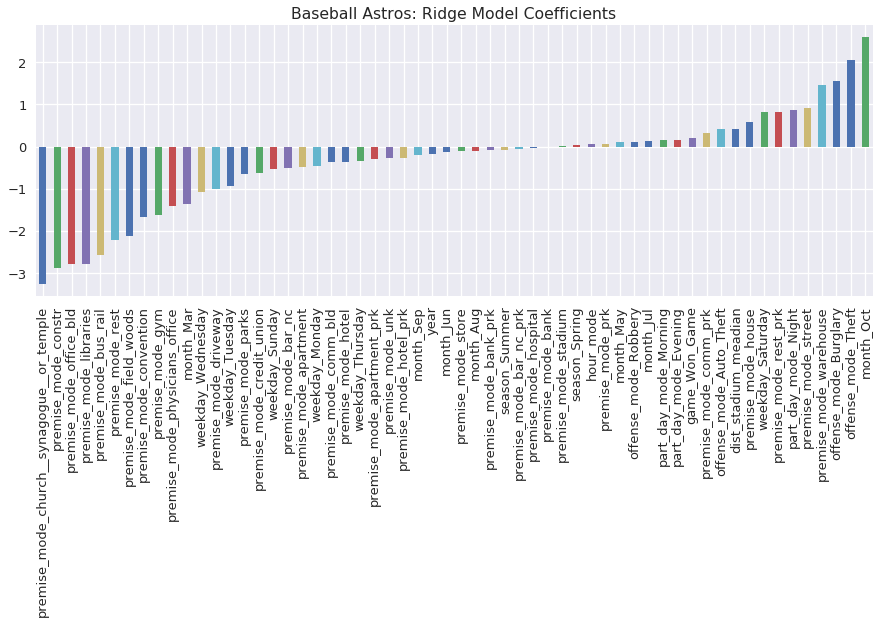

In [20]:
title = 'Baseball Astros: Ridge Model Coefficients'

modelfit(alg2,X,y)
coef2 = pd.Series(alg2.coef_, X_cols).sort_values()
coef2.plot(kind='bar', title=title,figsize=(15,5))
plt.savefig(title.replace(' ','_'),bbox_inches="tight")
plt.show()


Model Report
RMSE : 3.231
CV Score : Mean  3.249 | Std  0.3112 | Min  2.772 | Max  3.79


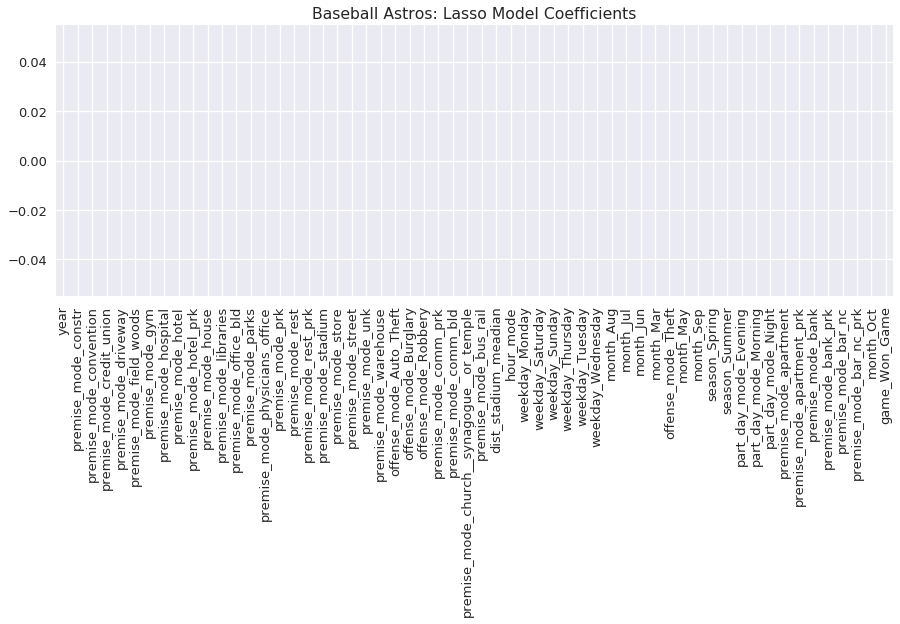

In [21]:


title = 'Baseball Astros: Lasso Model Coefficients'
modelfit(alg3,X,y)
coef3 = pd.Series(alg3.coef_, X_cols).sort_values()
coef3.plot(kind='bar', title=title,figsize=(15,5))
plt.savefig(title.replace(' ','_'),bbox_inches="tight")
plt.show()